In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

from main import rodar_simulacao
from search import AStarSearch
from player import (
    DefaultPlayer, 
    AdaptivePlayer, 
    BatchCollectorPlayer, 
    RechargerPlayer, 
    OptimalPlayer
)

pygame 2.6.1 (SDL 2.28.4, Python 3.13.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [13]:
def monte_carlo(player_cls, seeds):
    """
    Executa n simulações Monte Carlo para a classe de player fornecida.
    Retorna uma lista de dicionários com os resultados.
    """
    results = []
    for seed in seeds:        
        r = rodar_simulacao(seed, player_cls, AStarSearch)
        r["player"] = player_cls.__name__
        r["seed"] = seed
        results.append(r)
    return results

def summarize(df: pd.DataFrame) -> pd.DataFrame:
    """
    Agrupa por 'player' e calcula estatísticas descritivas e percentuais.
    """
    summary = df.groupby("player").agg(
        mean_steps      = ("passos",  "mean"),
        std_steps       = ("passos",  "std"),
        mean_score      = ("score",   "mean"),
        std_score       = ("score",   "std"),
        mean_deliveries = ("entregas","mean"),
        std_deliveries  = ("entregas","std"),
        mean_battery    = ("bateria", "mean"),
        std_battery     = ("bateria", "std"),
        pct_score_neg   = ("score",   lambda s: (s < 0).mean() * 100),
        pct_batt_neg    = ("negative_battery_count", lambda s: (s > 0).mean() * 100),
        mean_time_ms    = ("sim_time", lambda s: s.mean() * 1000),
        std_time_ms     = ("sim_time", lambda s: s.std() * 1000),
    )
    return summary

def plot_summary(summary: pd.DataFrame):
    """
    Plota gráficos de barras para as principais métricas do summary.
    """
    metrics = {
        "mean_steps":       ("Passos Médios",                   "Número Médio de Passos"),
        "mean_score":       ("Score Médio",                     "Pontos Médios"),
        "mean_deliveries":  ("Entregas Médias",                "Número Médio de Entregas"),
        "mean_battery":     ("Bateria Média",                  "Carga Média Restante"),
        "pct_score_neg":    ("% de Scores Negativos",           "Percentual de Simulações com Score < 0"),
        "pct_batt_neg":     ("% de Baterias Negativas",         "Percentual de Simulações com Bateria Negativa"),
        "mean_time_ms":     ("Tempo Médio por Simulação (ms)",  "Milissegundos Médios por Simulação"),
    }

    for metric, (title, ylabel) in metrics.items():
        plt.figure(figsize=(6,4))
        summary[metric].plot(kind="bar")
        plt.title(title)
        plt.xlabel("Player")
        plt.ylabel(ylabel)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [4]:
# Lista de players
players = [
    DefaultPlayer,
    AdaptivePlayer,
    BatchCollectorPlayer,
    RechargerPlayer,
    OptimalPlayer,
]

# Gera seeds fixas
num_simulations = 300
random.seed(42)
seeds = [random.randint(0, 100_000) for _ in range(num_simulations)]

# Executa simulações
all_results = []
for cls in players:
    print(f"Executando Monte Carlo para {cls.__name__}...")
    all_results.extend(monte_carlo(cls, seeds))

# Cria DataFrame
df = pd.DataFrame(all_results)

Executando Monte Carlo para DefaultPlayer...
Executando Monte Carlo para AdaptivePlayer...
Executando Monte Carlo para BatchCollectorPlayer...
Executando Monte Carlo para RechargerPlayer...
Executando Monte Carlo para OptimalPlayer...


In [14]:
# Cria resumo
summary = summarize(df).round(2)

# Exibe o resumo
display(summary)

# Salva (opcional)
summary.to_csv("player_comparison_summary.csv")
print("Resumo salvo em player_comparison_summary.csv")

,mean_steps,std_steps,mean_score,std_score,mean_deliveries,std_deliveries,mean_battery,std_battery,pct_score_neg,pct_batt_neg,mean_time_ms,std_time_ms
player,,,,,,,,,,,,
AdaptivePlayer,103.65,20.89,-25.01,103.74,4.00,0.06,-27.70,25.40,53.67,89.67,9.85,6.66
BatchCollectorPlayer,131.97,19.25,-156.89,110.08,4.00,0.06,-49.53,35.24,90.67,99.00,7.35,5.10
DefaultPlayer,115.60,26.86,-82.42,134.66,3.99,0.23,-37.44,33.75,67.33,93.67,1.53,1.78
OptimalPlayer,92.33,16.24,102.64,23.00,4.00,0.06,14.32,15.38,0.33,23.00,353.49,46.67
RechargerPlayer,133.27,36.44,64.73,38.60,3.96,0.20,35.20,9.02,4.67,0.00,13.90,9.47


Resumo salvo em player_comparison_summary.csv


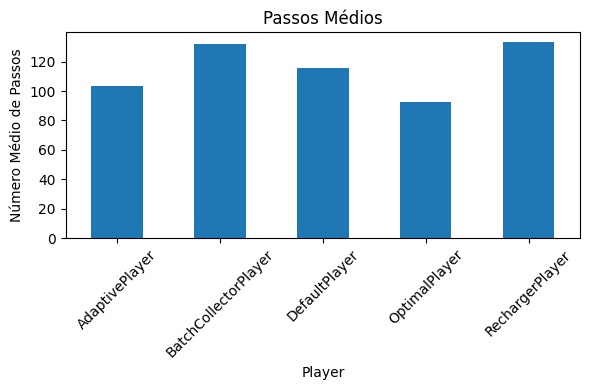

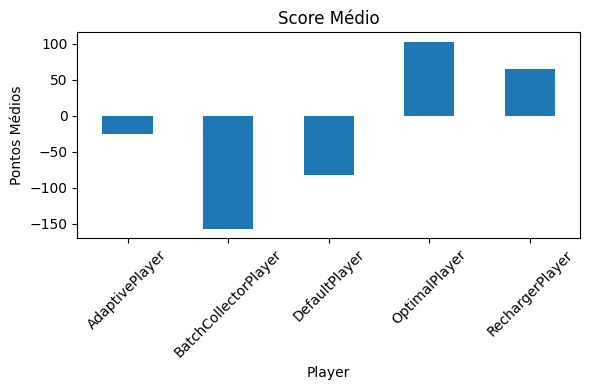

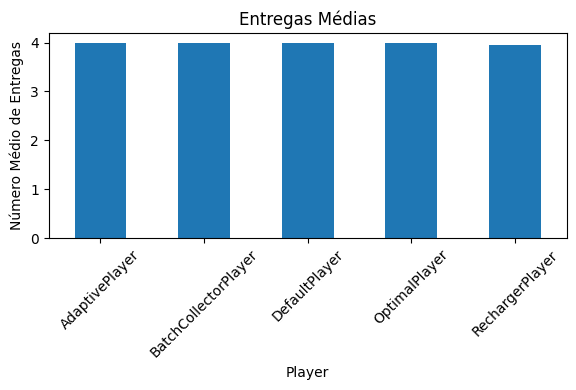

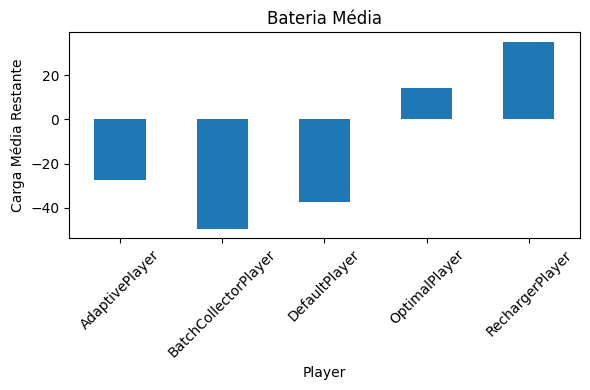

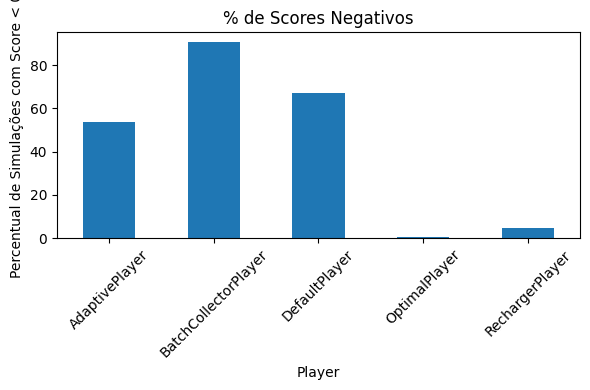

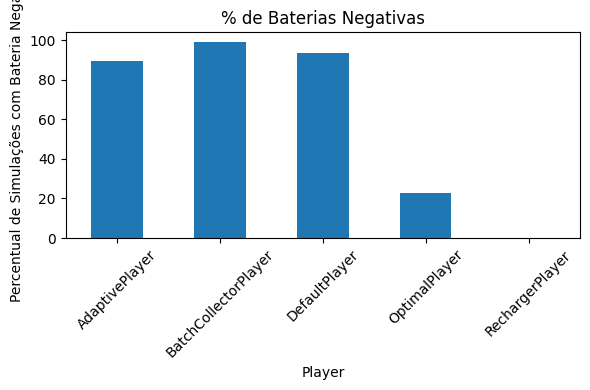

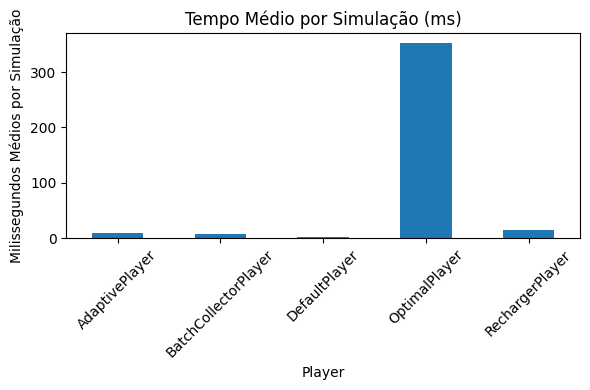

In [15]:
# Plota
plot_summary(summary)